<a href="https://colab.research.google.com/github/ss22aba/NEW/blob/main/NEW_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.2 MB/s eta 0:00:00


# **Importing Libraries**

In [69]:
# Importing Libraries
import pandas as pd
import numpy as np

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Pre-Processing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



#Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Importing Data**

In [70]:
# Uploading the dataset into the colab
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv


In [71]:
# Read the CSV file into a DataFrame
data = pd.read_csv("Telco-Customer-Churn.csv")

# Display the first five rows of the DataFrame
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Dataset Information**

In [72]:
# Display the summary information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Get the shape of the DataFrame
data.shape

(7043, 21)

# **Dataset Cleaning**

In [8]:
# Check for any missing values
data.isnull().any().any()

False

<Axes: >

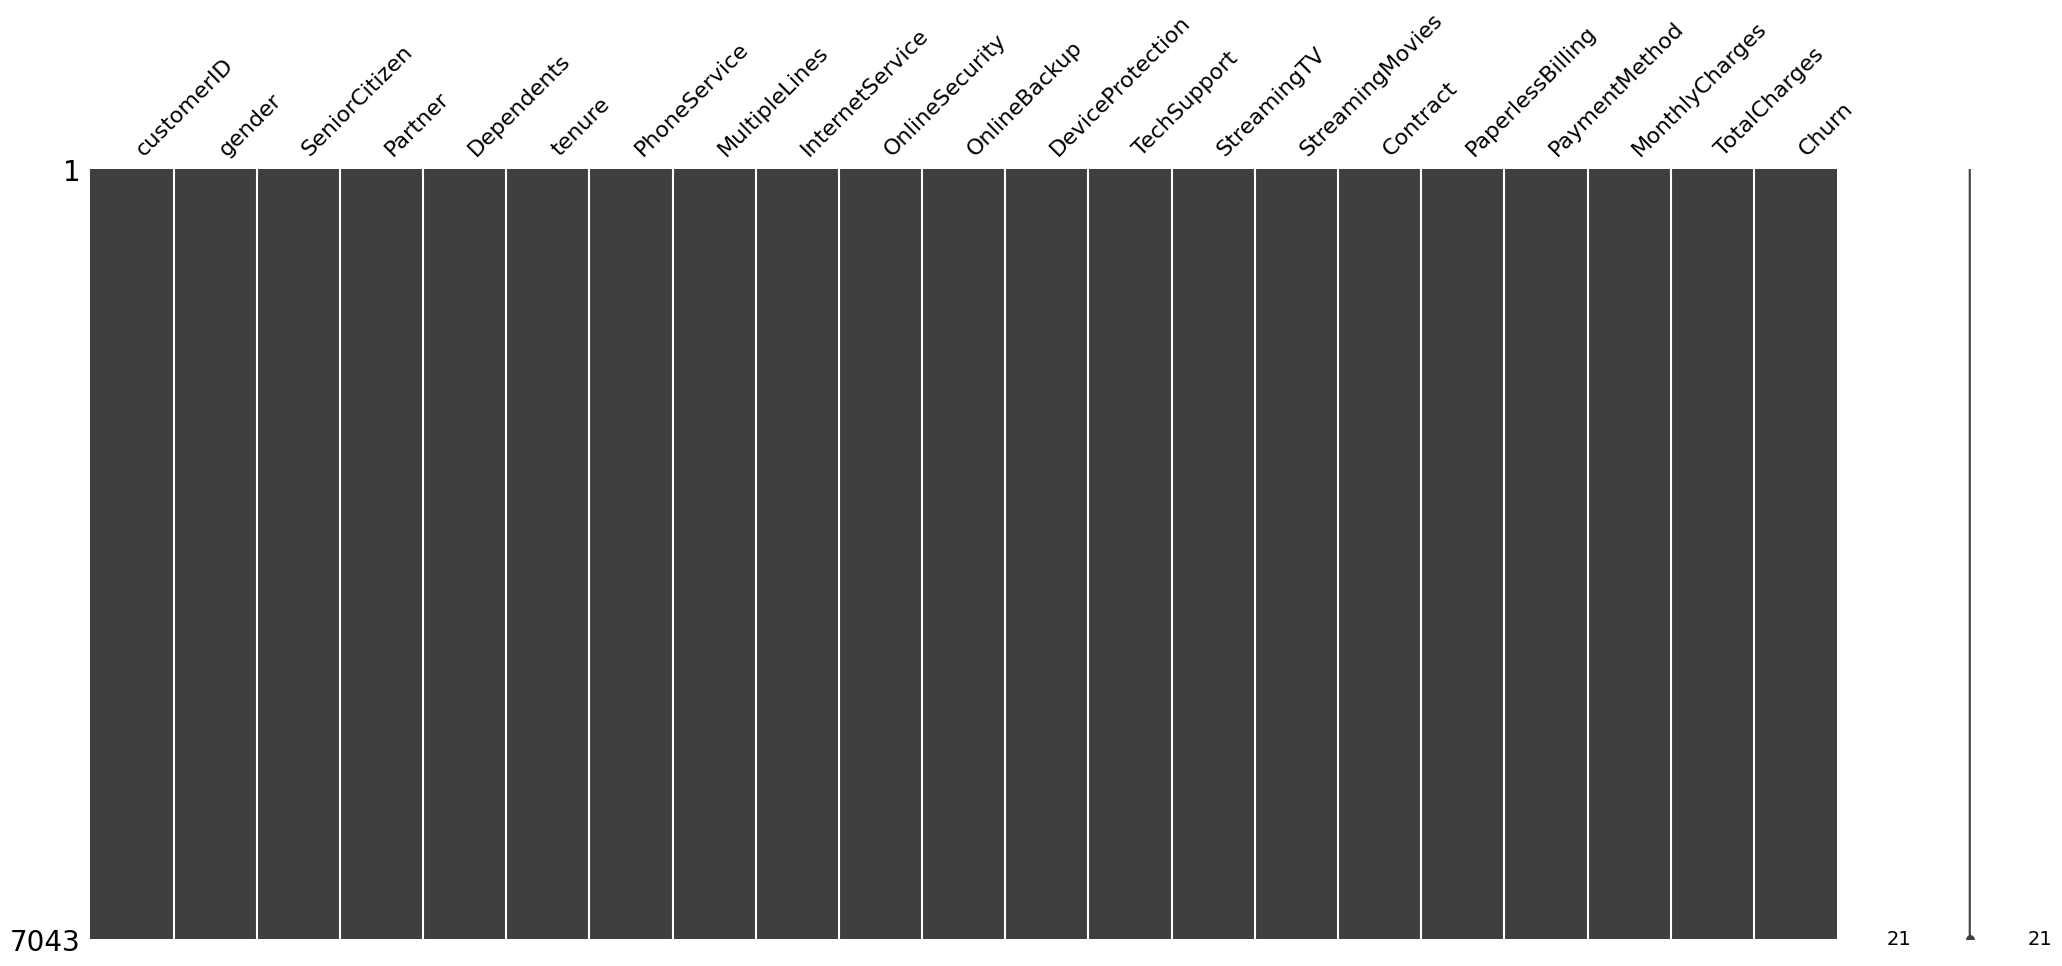

In [10]:
# Visualize the missing data
import missingno as msno
msno.matrix(data)

In [9]:
# Drop the 'customerID' column
data = data.drop(["customerID"], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Filter rows where "TotalCharges" is an empty string
data[data["TotalCharges"].str.strip() == '']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [39]:
# Convert "TotalCharges" to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

# Check the number of missing values in each column
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [40]:
# Fill NaN values in "TotalCharges" with the mean of the column
data.fillna(data["TotalCharges"].mean())

# Verify the operation
print(data.head())
print("Number of rows after removal and imputation:", data.shape[0])
print("Number of missing values after imputation:", data.isnull().sum())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [41]:
# Dropping rows with any missing values
data = data.dropna()

In [42]:
#Convert categorial features to binary matrix (dummy variable)
data_dummies = pd.get_dummies(data, drop_first = True)

# Rename Churn_yes to Churn
data_dummies.rename(columns = {'Churn_Yes': 'Churn'}, inplace = True)

# **Exploratory Data Analysis**

In [54]:
# Iterate through the columns and print unique values for non-numeric columns
for col in data.columns:
    if data[col].dtype != 'int64' and data[col].dtype != 'float64':
        print(f'{col}: {data[col].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [44]:
# Labels that correspond to the values in the "Churn" column
type_ = ["No", "yes"]
# Create the pie chart
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Pie(labels=type_, values=data['Churn'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [21]:
def numericalKde(feature):
    plt.figure(figsize=(11, 4))
    plt.title("KDE for {}".format(feature))
    ax1 = sns.kdeplot(data[data['Churn']== 'No'][feature].dropna(), color = '#C9E4DE', label = 'Churn: No')
    ax2 = sns.kdeplot(data[data['Churn']== 'Yes'][feature].dropna(), color = '#fec3a6', label = 'Churn: Yes')
    plt.legend()

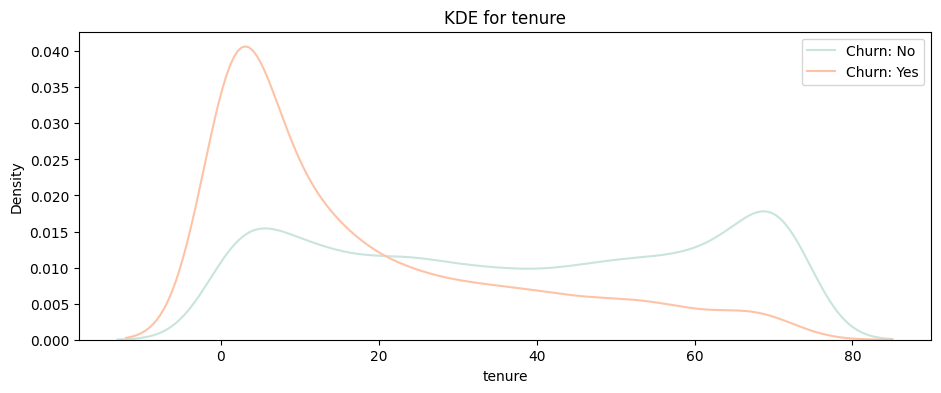

In [22]:
numericalKde('tenure')

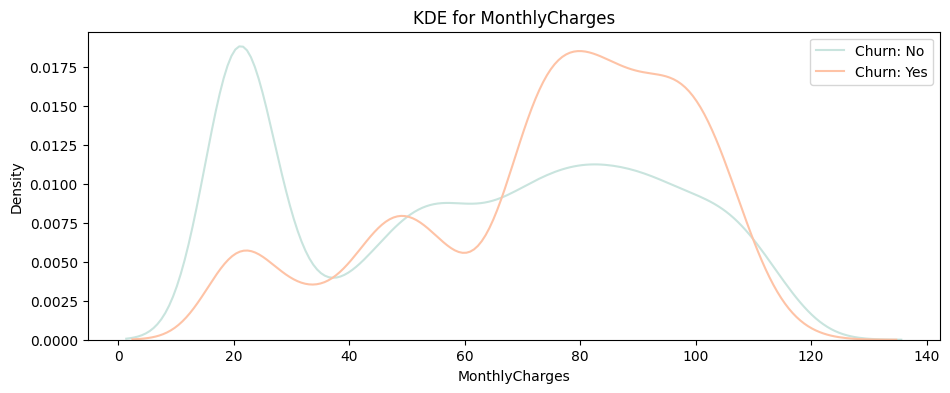

In [23]:
numericalKde('MonthlyCharges')

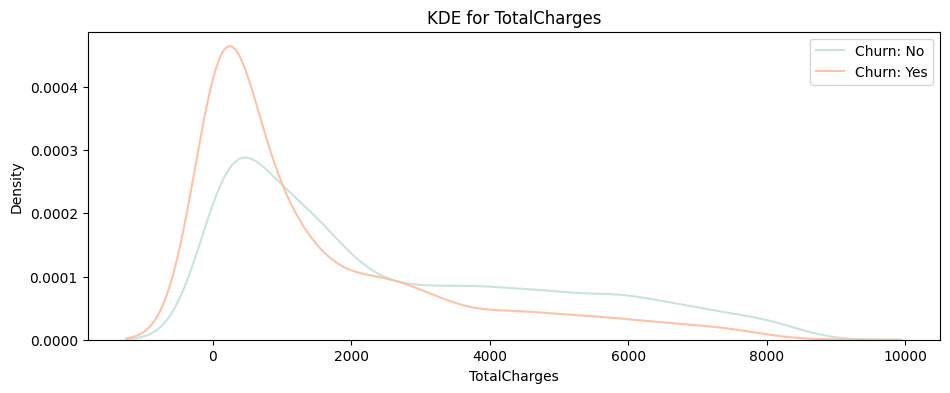

In [24]:
numericalKde('TotalCharges')

In [25]:
def categoricalBar(feature, ax):
    sns.countplot(x=feature, hue='Churn', data=data, ax=ax, palette=['#C9E4DE', '#fec3a6'])
    ax.set_title(f'Count of Churn by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

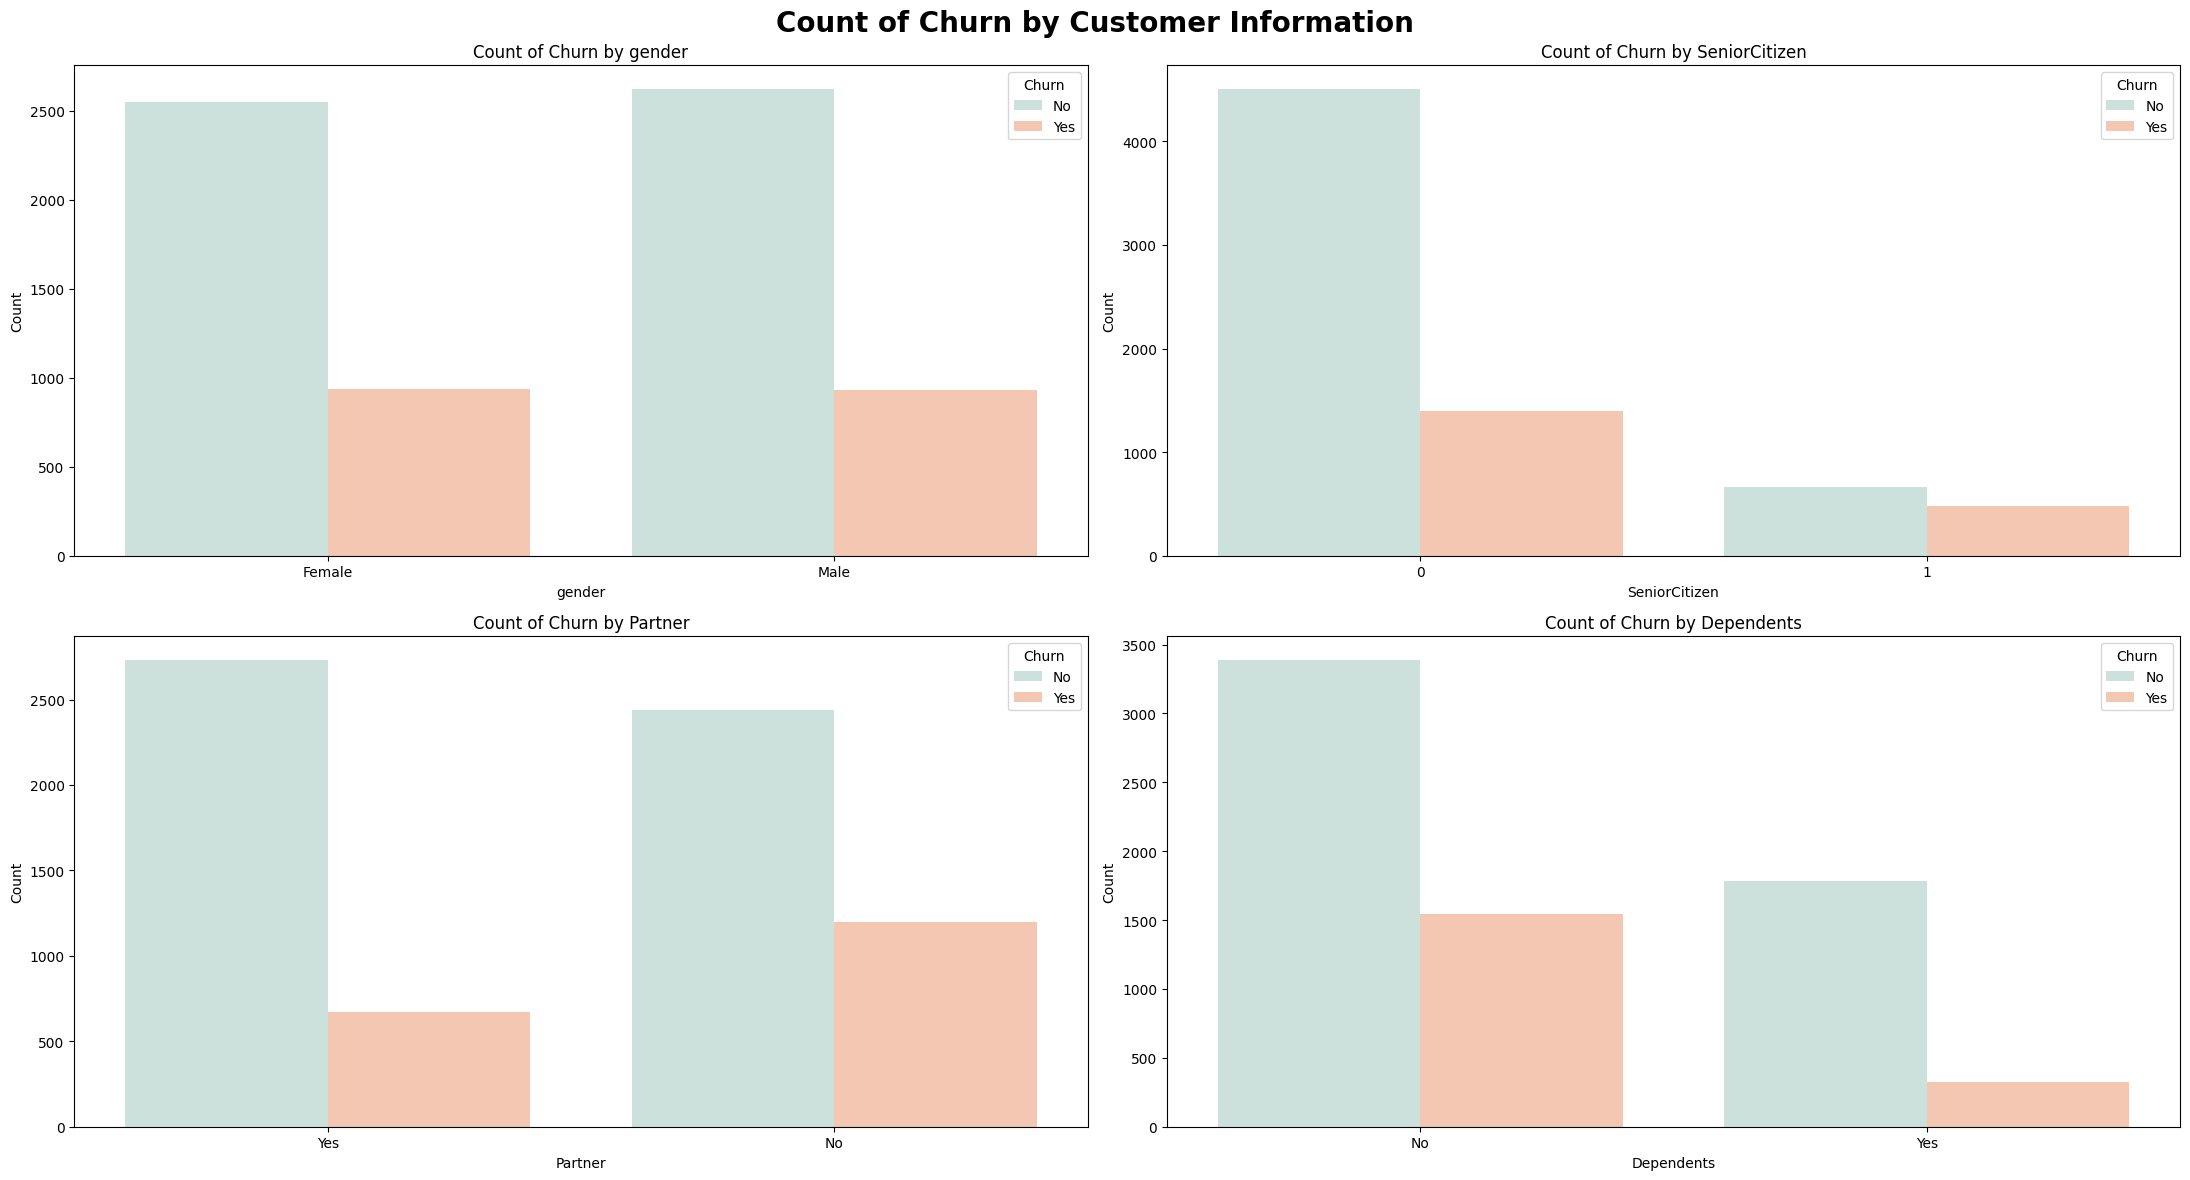

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 12))
categoricalBar('gender',ax1)
categoricalBar('SeniorCitizen',ax2)
categoricalBar('Partner',ax3)
categoricalBar('Dependents',ax4)

fig.suptitle('Count of Churn by Customer Information', fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

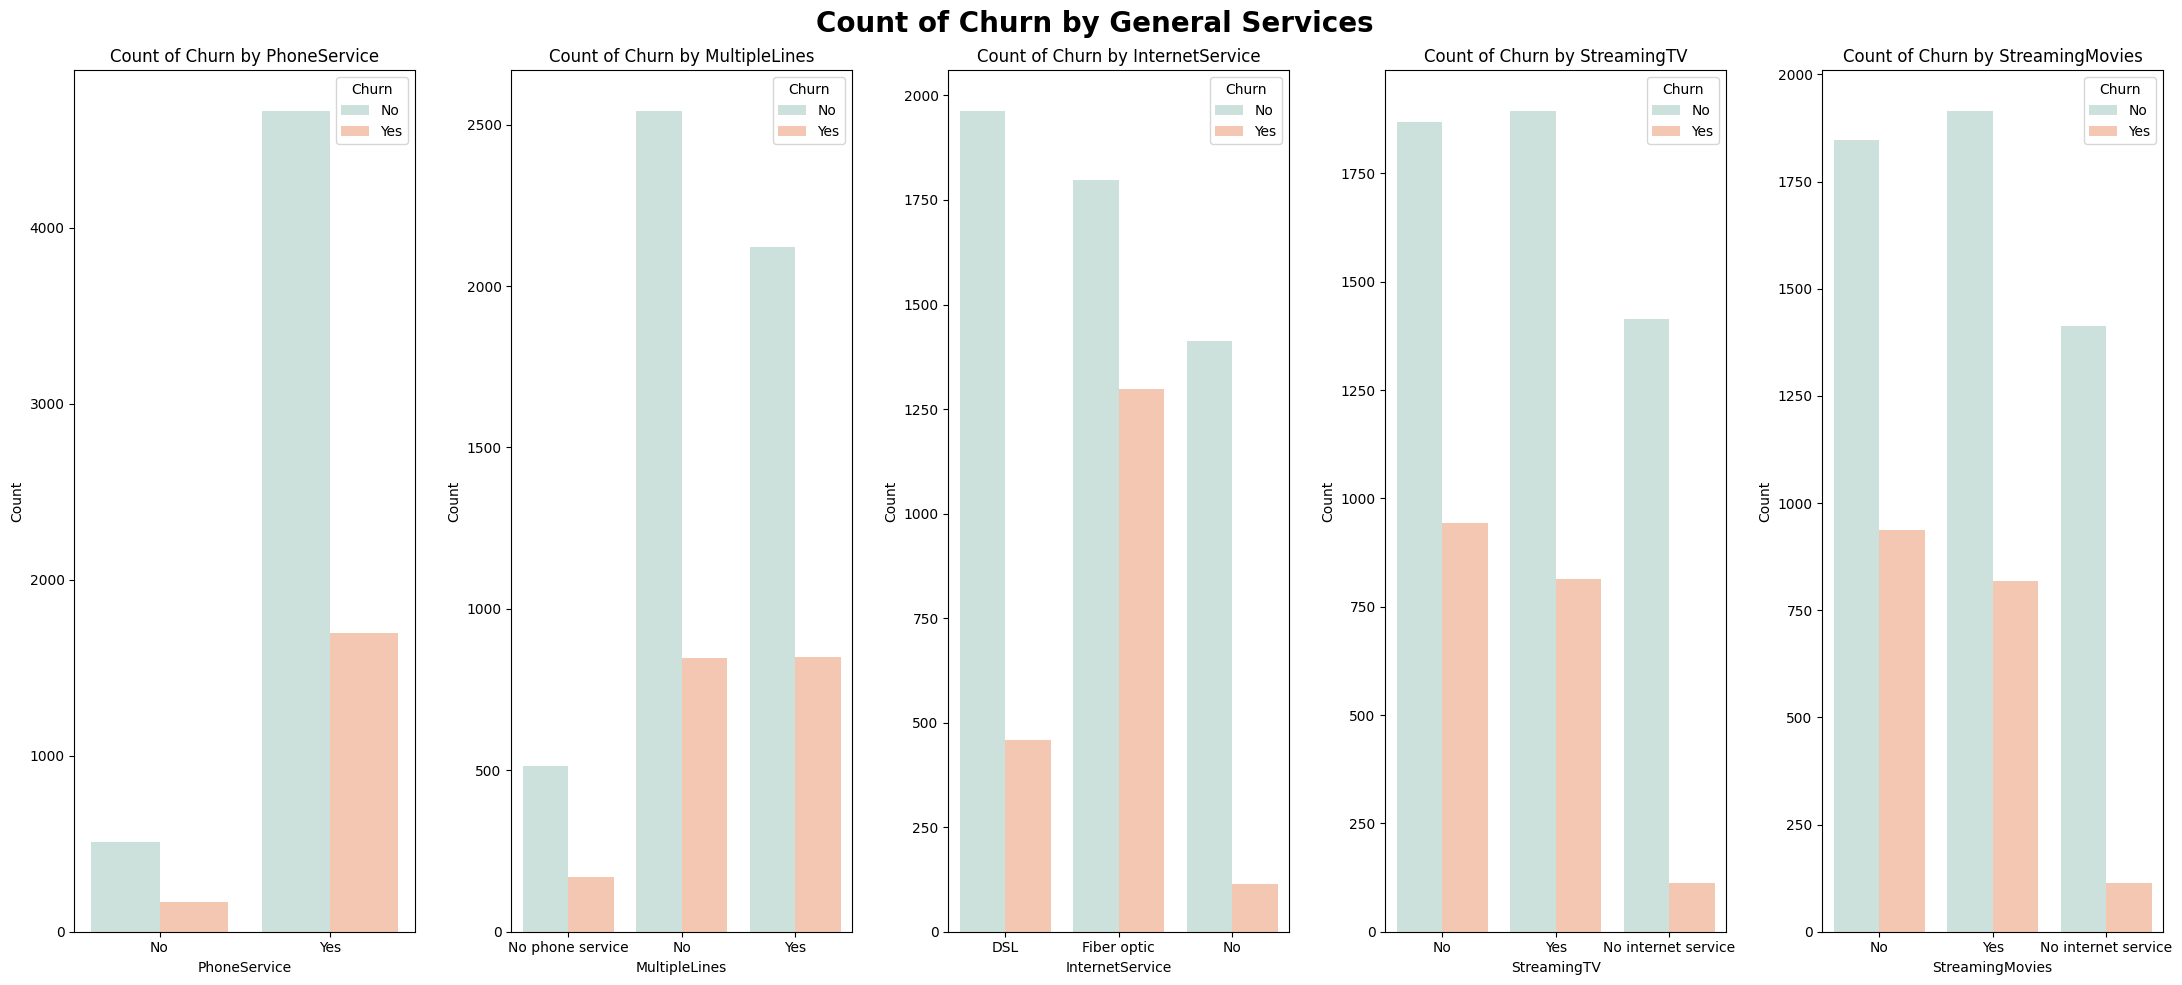

In [27]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(22, 10))
categoricalBar('PhoneService',ax1)
categoricalBar('MultipleLines',ax2)
categoricalBar('InternetService',ax3)
categoricalBar('StreamingTV',ax4)
categoricalBar('StreamingMovies',ax5)

fig.suptitle('Count of Churn by General Services', fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

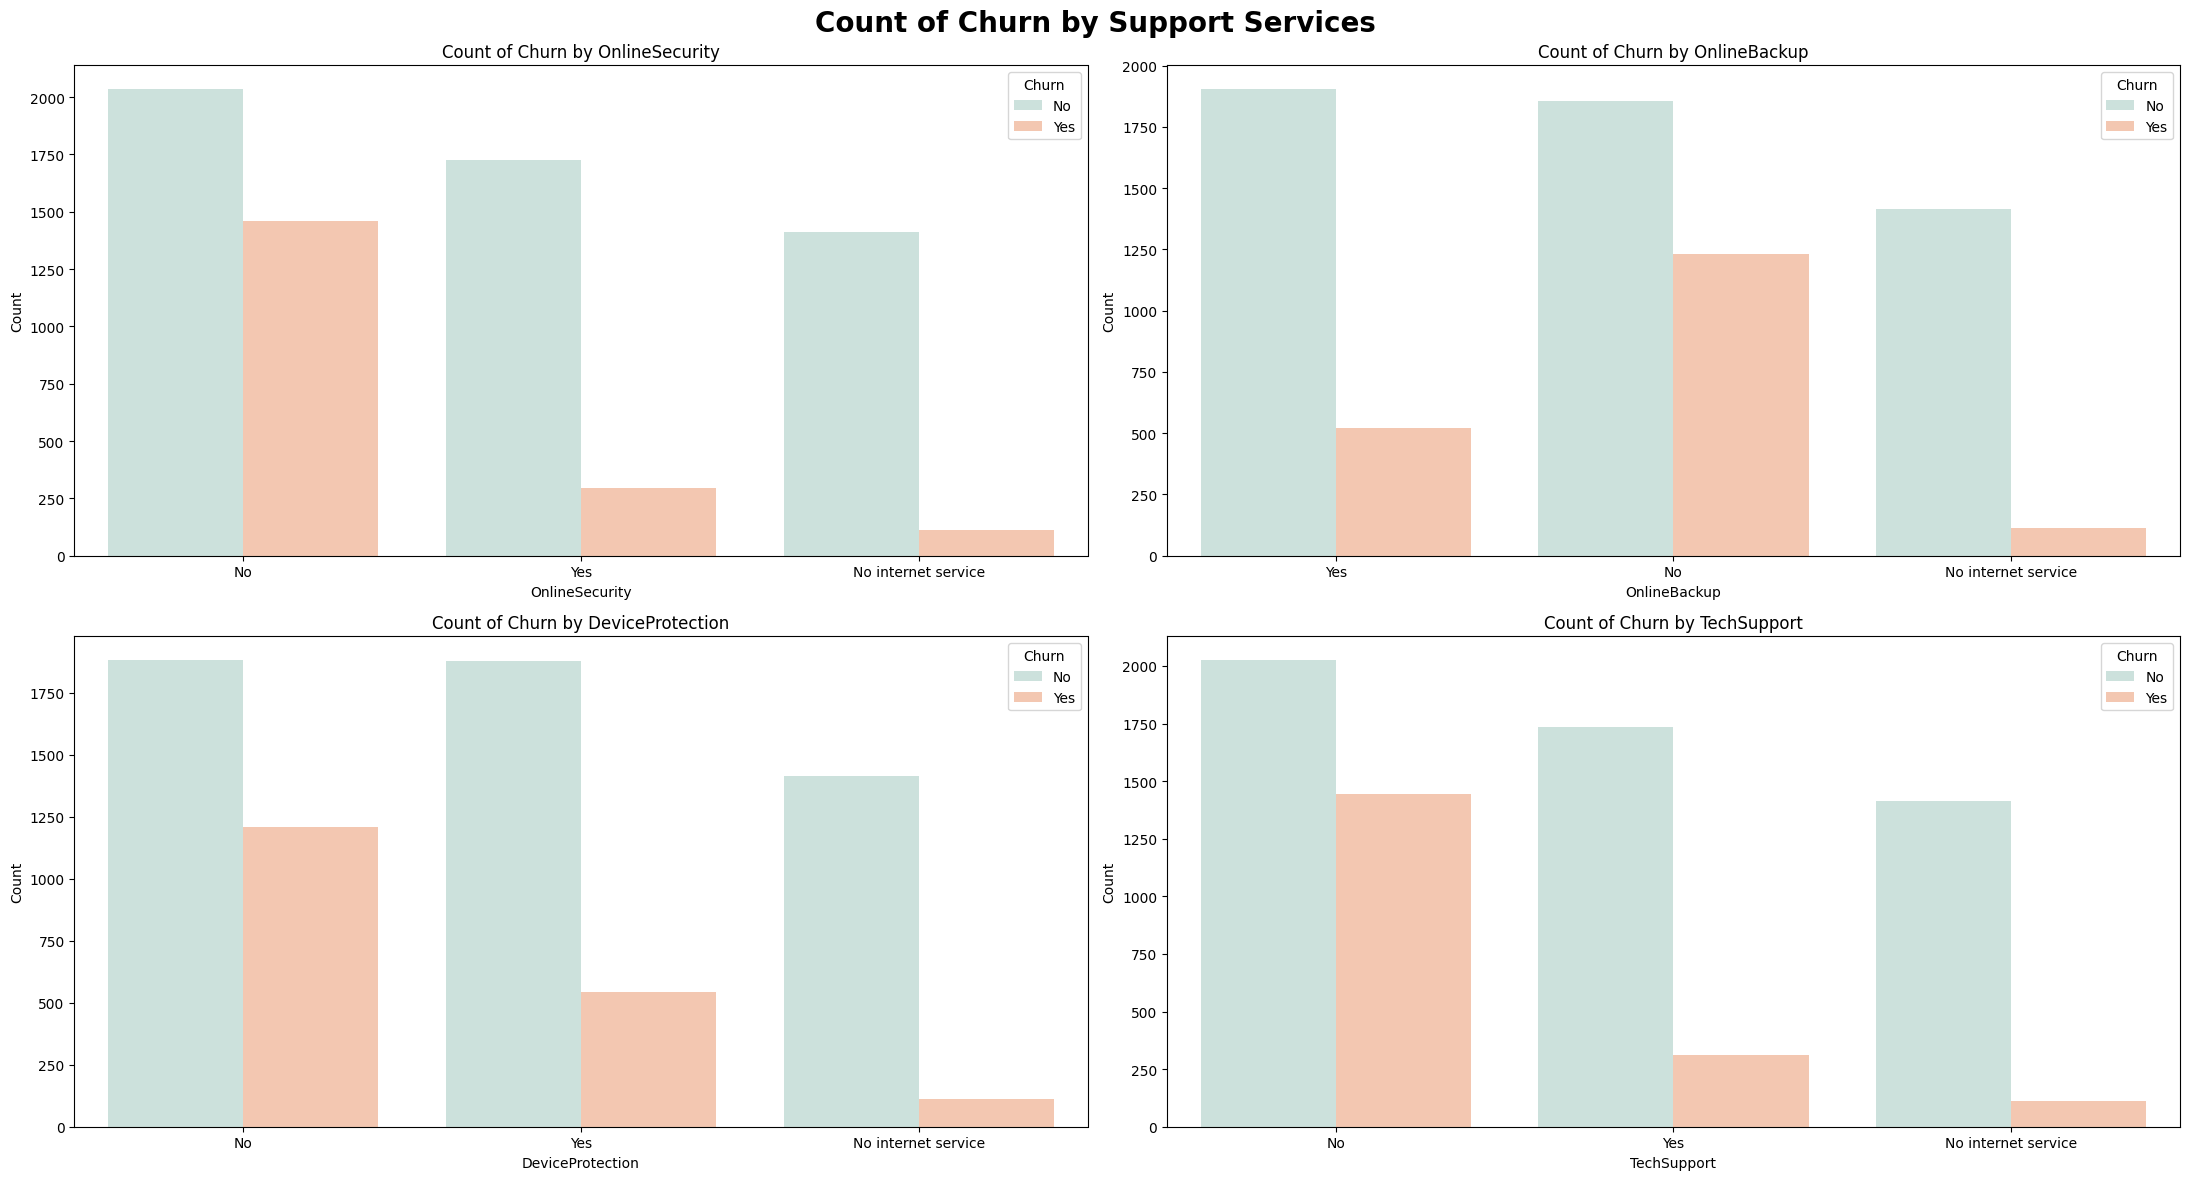

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 12))
categoricalBar('OnlineSecurity',ax1)
categoricalBar('OnlineBackup',ax2)
categoricalBar('DeviceProtection',ax3)
categoricalBar('TechSupport',ax4)

fig.suptitle('Count of Churn by Support Services', fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

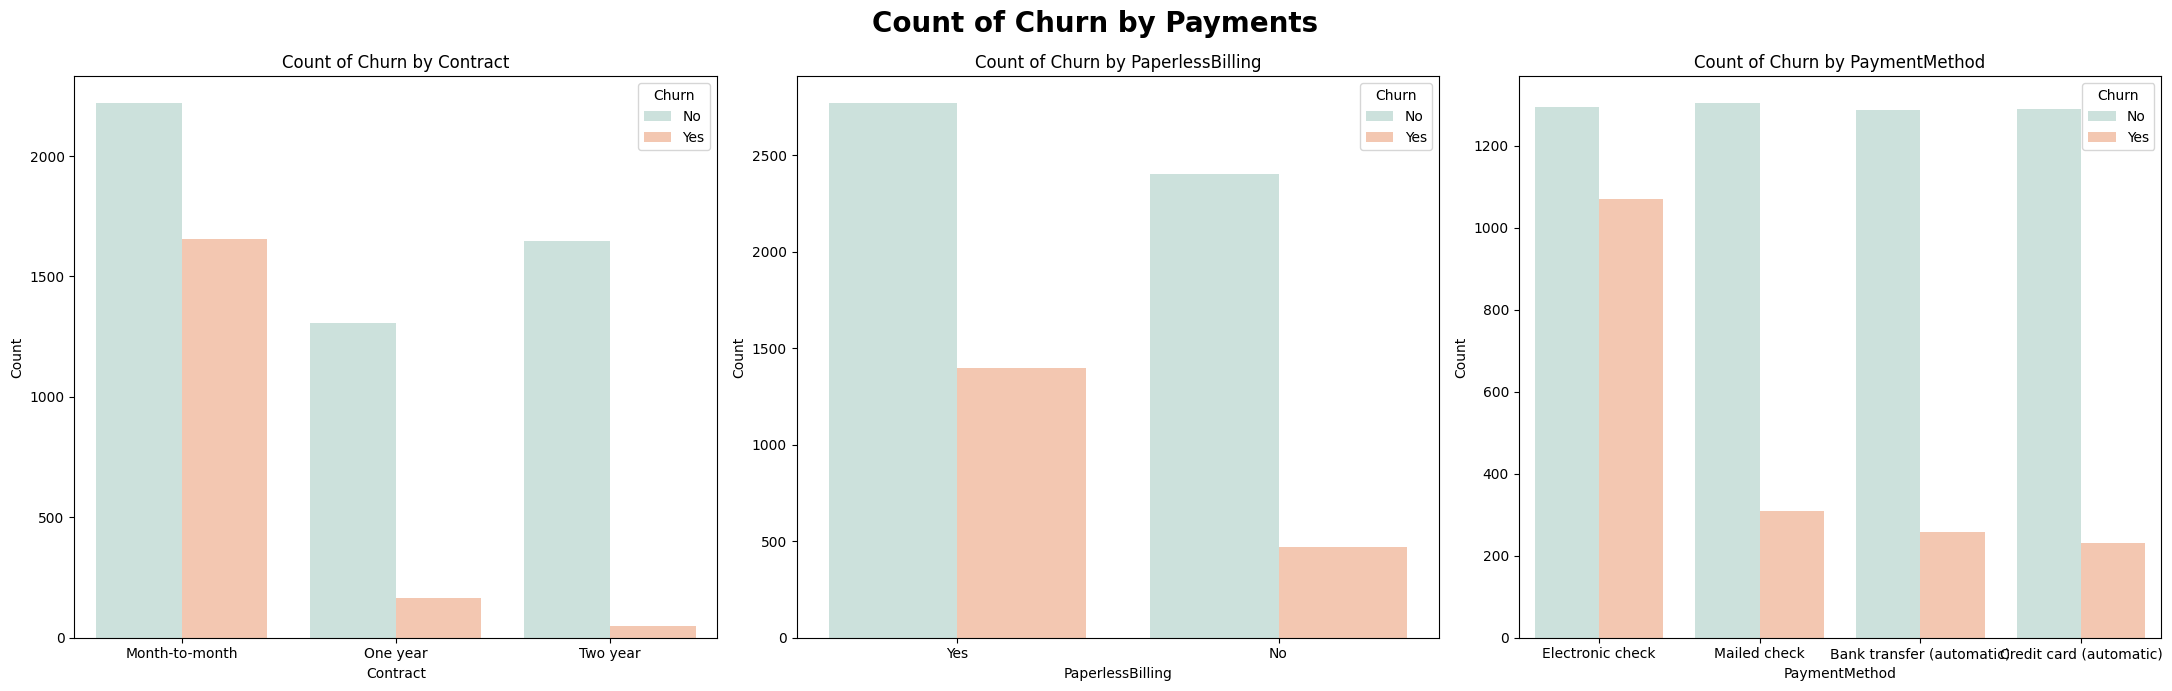

In [29]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(22, 7))
categoricalBar('Contract',ax1)
categoricalBar('PaperlessBilling',ax2)
categoricalBar('PaymentMethod',ax3)

fig.suptitle('Count of Churn by Payments', fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

# **Data Pre-Processing**